https://www.sciencedirect.com/science/article/pii/S1535610824000461?via%3Dihub

In [239]:
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce  # for harmony
import scanpy as sc
import matplotlib.pyplot as plt

# Add parent directory to Python path
sys.path.append(os.path.abspath(".."))  

from scrna_pipeline import standard_scrna_pipeline


In [240]:


# Path to raw AnnData file (adjust as needed)
raw_path = "/Users/alahi.irfan/Desktop/Local_workspace/Data/Zheng_CancerCell_2024/GSE222315_RAW/merged_BCa_NAT.h5ad"

# Read the raw data
adata_raw = sc.read_h5ad(raw_path)

print(adata_raw)
adata_raw.obs.head()

AnnData object with n_obs × n_vars = 103349 × 37458
    obs: 'gsm', 'sample', 'condition', 'batch'
    layers: 'counts'


gsm sample condition       batch
barcode                                                               
GSM6919778:AAACCTGAGCGTCTAT-1  GSM6919778     p1       BCA  GSM6919778
GSM6919778:AAACCTGAGGCAGGTT-1  GSM6919778     p1       BCA  GSM6919778
GSM6919778:AAACCTGAGGTTACCT-1  GSM6919778     p1       BCA  GSM6919778
GSM6919778:AAACCTGAGTGGTAGC-1  GSM6919778     p1       BCA  GSM6919778
GSM6919778:AAACCTGAGTGTGGCA-1  GSM6919778     p1       BCA  GSM6919778

In [241]:
adata_raw.obs["sample"].value_counts()

sample
p2    26795
p5    14570
p4    14395
p3    11046
p1    10386
p9     7210
p8     7054
p7     6101
p6     5792
Name: count, dtype: int64

In [242]:
adata_raw.obs["condition"].value_counts()

condition
BCA    77429
NAT    25920
Name: count, dtype: int64

In [243]:
adata_raw.obs[adata_raw.obs["condition"]=='NAT']['sample'].value_counts()

sample
p2    10675
p4     7455
p5     6407
p3     1383
p1        0
p6        0
p7        0
p8        0
p9        0
Name: count, dtype: int64

In [244]:
adata_raw.obs[adata_raw.obs["condition"]=='BCA']['sample'].value_counts()

sample
p2    16120
p1    10386
p3     9663
p5     8163
p9     7210
p8     7054
p4     6940
p7     6101
p6     5792
Name: count, dtype: int64

In [245]:

keep_samples = [ "p2"]

adata_raw = adata_raw[adata_raw.obs["sample"].isin(keep_samples)]
adata_raw = adata_raw[adata_raw.obs["condition"]=='BCA']

In [246]:
# Choose the column in adata.obs that encodes batch / sample.
# If you have no batches, you can set batch_key=None and batch_method="none".
batch_key = "sample"   # change if your column is named differently

# Run the standard pipeline:
# - QC + filters + Scrublet
# - HVGs (Seurat v3 on counts by default)
# - normalize/log + scale + PCA
# - Harmony batch correction
# - neighbors + Leiden + UMAP
adata_proc = standard_scrna_pipeline(
    adata_raw,
    batch_key=batch_key,

    # batch correction method
    batch_method="harmony",

    # HVG selection
    hvg_flavor= "seurat", #"seurat_v3",
    n_top_genes=2000,

    # clustering
    clustering_method="leiden",

    # 👇 All preprocessing options go here
    preprocess_kwargs={
        "use_ribo_filter": False,
        "use_mito_filter": True
    },
)


print(adata_proc)



[ scrna-pipeline ] Running standard scRNA-seq pipeline
  • Input AnnData shape: 16120 cells × 37458 genes
  • Batch key:         'sample'
  • Batch method:      'harmony'
  • HVG flavor:        'seurat'
  • n_top_genes:       2000
  • n_pcs:             50
  • Clustering:        'leiden'
  • Cluster resol.:    0.6
  • Preprocess kwargs: {'use_mito_filter': True, 'use_ribo_filter': False}
  • Batch kwargs:      {}
  • Cluster kwargs:    {}



/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/site-packages/anndata/_core/anndata.py:602: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/Users/alahi.irfan/Desktop/Local_workspace/scRNA-seq-pipeline/scrna_pipeline/preprocessing.py:101: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  adata.X = adata.layers["counts"].copy()
/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


Running Scrublet for doublet detection...
Removed 88 predicted doublets
After doublet removal: (14823, 20706)


/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
2025-12-11 11:03:26,092 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


[ scrna-pipeline ] Step 1 complete: preprocess_to_pca
  • PCA stored in .obsm['X_pca']
  • Genes after HVG selection: 2000
  • Cells after QC / Scrublet: 14823

Running Harmony batch correction using batch_key='sample'...


2025-12-11 11:03:26,959 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-12-11 11:03:26,982 - harmonypy - INFO - Iteration 1 of 10
2025-12-11 11:03:27,947 - harmonypy - INFO - Iteration 2 of 10
2025-12-11 11:03:28,901 - harmonypy - INFO - Iteration 3 of 10
2025-12-11 11:03:29,857 - harmonypy - INFO - Iteration 4 of 10
2025-12-11 11:03:30,629 - harmonypy - INFO - Iteration 5 of 10
2025-12-11 11:03:30,947 - harmonypy - INFO - Converged after 5 iterations


[ scrna-pipeline ] Step 2 complete: batch correction with 'harmony'
  • Corrected embedding stored in .obsm['X_pca_harmony']

[ scrna-pipeline ] Step 3 complete: clustering + UMAP
  • Cluster labels in .obs['leiden']
  • UMAP stored in .obsm['X_umap']
  • Final AnnData shape: 14823 cells × 2000 genes

AnnData object with n_obs × n_vars = 14823 × 2000
    obs: 'gsm', 'sample', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'm

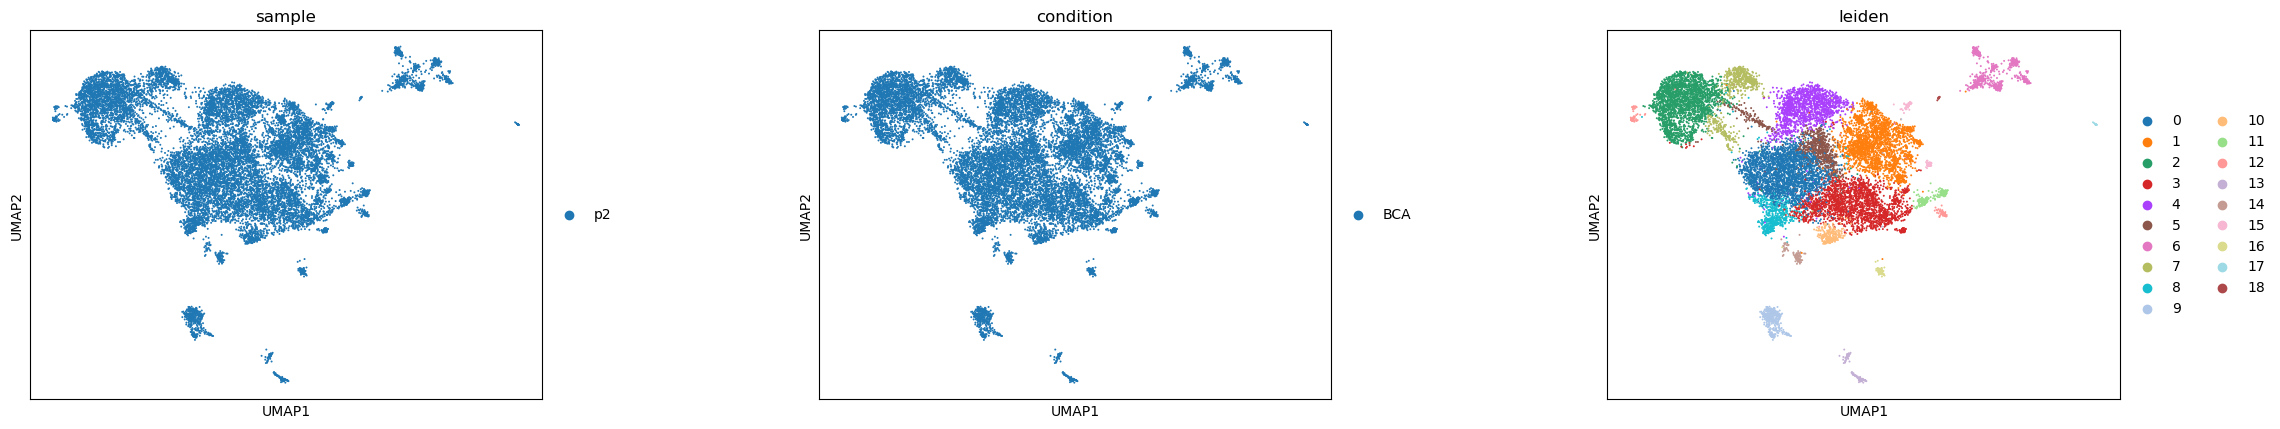

In [247]:
# Quick UMAP overview:
# - color by batch (e.g. "sample")
# - color by cluster ("louvain")
umap_colors = []

if "sample" in adata_proc.obs.columns:
    umap_colors.append("sample")

if "condition" in adata_proc.obs.columns:   # only if present in your data
    umap_colors.append("condition")

if "louvain" in adata_proc.obs.columns:
    umap_colors.append("louvain")

if "leiden" in adata_proc.obs.columns:
    umap_colors.append("leiden")

sc.pl.umap(
    adata_proc,
    color=umap_colors,
    wspace=0.4,
)


In [248]:
from scrna_pipeline.annotation import score_markers_and_suggest_labels

# ------------------------------------------------------------------
# 1) Define marker dictionary
# ------------------------------------------------------------------
marker_dict = {
    # -----------------------
    # Epithelial 
    # -----------------------
    "Epithelial": [
        "EPCAM",   # classic epithelial marker
        "KRT8",
        "KRT18",
        "KRT19",
        "KRT17",
        "KRT5",
        "KRT14",
        "MUC1",    # luminal / glandular epithelial
    ],

    # -----------------------
    # Immune lineages
    # -----------------------
    "T_cell": [
        "CD3D", "CD3E", "CD2", "CD8A", "CD4",
    ],
    "B_cell": [
        "MS4A1", "CD79A", "CD79B",
    ],
    "Myeloid": [
        "LYZ",
        "CD68", "CD14",
        "TYROBP", "LST1",
        "CSF1R", "FCGR3A",
    ],

    # -----------------------
    # Stromal + mast
    # -----------------------
    "Endothelial": [
        "PECAM1", "VWF", "KDR",
    ],
    "Fibroblast": [
        "COL1A1", "COL1A2", "DCN", "LUM",
    ],
    "Mast": [
        "TPSAB1", "TPSB2", "CPA3", "KIT", "HDC", "MS4A2",
    ],
}

# ------------------------------------------------------------------
# 2) Pick a cluster column automatically
# ------------------------------------------------------------------
if "leiden" in adata_proc.obs:
    cluster_key = "leiden"
elif "louvain" in adata_proc.obs:
    cluster_key = "louvain"
elif "cluster" in adata_proc.obs:
    # in case you manually created a generic cluster column
    cluster_key = "cluster"
else:
    raise ValueError(
        "No clustering column found in `adata.obs`. "
        "Expected one of: 'leiden', 'louvain', or 'cluster'."
    )

print(f"Using cluster_key = '{cluster_key}' for marker-based annotation.")

# ------------------------------------------------------------------
# 3) Score markers and get suggested labels
# ------------------------------------------------------------------
cluster_scores, suggested = score_markers_and_suggest_labels(
    adata_proc,
    marker_dict=marker_dict,
    cluster_key=cluster_key,
)

# ------------------------------------------------------------------
# 4) Pretty display (with fallback if styling fails)
# ------------------------------------------------------------------
try:
    display(
        cluster_scores
        .round(2)
        .style
        .background_gradient(cmap="viridis")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            dict(selector="th", props=[("text-align", "center")]),
        ])
    )
except Exception as e:
    # e.g. jinja2 not installed or in non-notebook context
    print("Styled display failed, showing plain table instead:", repr(e))
    display(cluster_scores.round(2))

# If you want, you can also inspect the suggested labels:
suggested


Using cluster_key = 'leiden' for marker-based annotation.


/Users/alahi.irfan/Desktop/Local_workspace/scRNA-seq-pipeline/scrna_pipeline/annotation.py:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(cluster_key)[score_cols]


leiden
0      Epithelial
1      Epithelial
2      Epithelial
3      Epithelial
4      Epithelial
5      Epithelial
6      Epithelial
7      Epithelial
8      Epithelial
9         Myeloid
10     Epithelial
11     Epithelial
12     Epithelial
13         T_cell
14     Epithelial
15     Epithelial
16     Epithelial
17    Endothelial
18     Epithelial
dtype: object

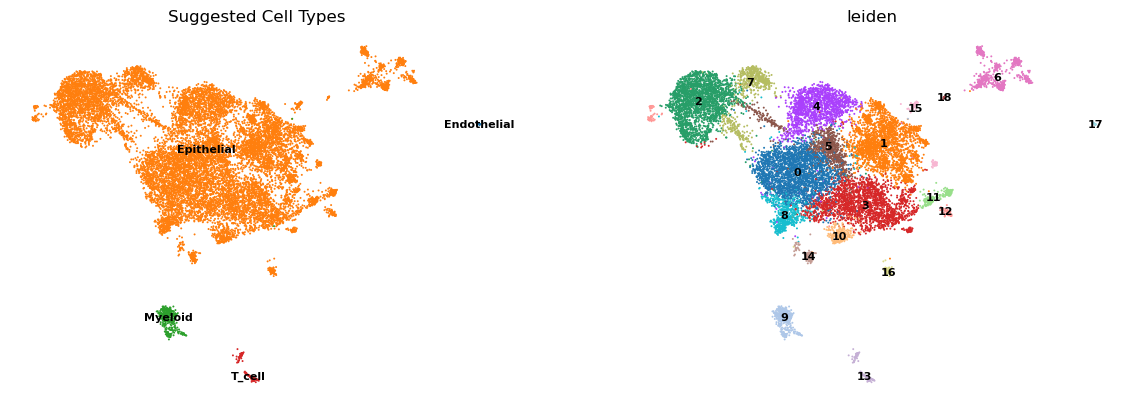

In [249]:


# Attach suggested labels for plotting
adata_proc.obs["celltype"] = adata_proc.obs[cluster_key].map(suggested)


sc.pl.umap(
    adata_proc,
    color=["celltype",cluster_key],
    legend_loc="on data",
    legend_fontsize=8,
    frameon=False,
    title="Suggested Cell Types",
)

In [250]:
markers = [
    "EPCAM", "KRT8", "KRT18",   # epithelial / tumor
    "CD3D", "CD3E",             # T cells
    "MS4A1",                    # B cells
    "CD14", "LYZ","CD68", "TYROBP", "LST1", "CSF1R", "FCGR3A", "S100A8", "S100A9", # myeloid / monocytes / macrophages
    "COL1A1", "COL1A2",          # fibroblasts / stromal
    "VWF", "PECAM1",             # endothelial 
    "IGKC", "IGHG1", "JCHAIN",   # Plasmocyte
    "MYH11",  "MYL9",   "DES"    # Myocyte
     
]

present = [g for g in markers if g in adata_proc.raw.var_names]
print("Markers present in this dataset:", present)

if present:
    sc.pl.umap(adata_proc, color=present, ncols=3, use_raw=True)


Markers present in this dataset: ['EPCAM', 'KRT8', 'KRT18', 'CD3D', 'CD3E', 'MS4A1', 'CD14', 'LYZ', 'CD68', 'TYROBP', 'LST1', 'CSF1R', 'FCGR3A', 'S100A8', 'S100A9', 'COL1A1', 'COL1A2', 'VWF', 'PECAM1', 'IGKC', 'IGHG1', 'JCHAIN', 'MYH11', 'MYL9']


# Tumor cell identification

In [251]:
from __future__ import annotations
from typing import Iterable, Sequence, Tuple, Optional

import scanpy as sc
from anndata import AnnData


# -------------------------------------------------
# Default human S and G2M gene sets (Scanpy tutorial)
# You can override these when calling the function.
# -------------------------------------------------
DEFAULT_S_GENES: Sequence[str] = [
    'MCM5','PCNA','TYMS','FEN1','MCM2','MCM4','RRM1','UNG','GINS2','MCM6',
    'CDCA7','DTL','PRIM1','UHRF1','MLF1IP','HELLS','RFC2','RPA2','NASP',
    'RAD51AP1','GMNN','WDR76','SLBP','CCNE2','UBR7','POLD3','MSH2','ATAD2',
    'RAD51','RRM2','CDC45','CDC6','EXO1','TIPIN','DSCC1','BLM','CASP8AP2',
    'USP1','CLSPN','POLA1','CHAF1B','BRIP1','E2F8'
]

DEFAULT_G2M_GENES: Sequence[str] = [
    'HMGB2','CDK1','NUSAP1','UBE2C','BIRC5','TPX2','TOP2A','NDC80','CKS2',
    'NUF2','CKS1B','MKI67','TMPO','CENPF','TACC3','FAM64A','SMC4','CCNB2',
    'CKAP2L','CKAP2','AURKB','BUB1','KIF11','ANP32E','TUBB4B','GTSE1',
    'KIF20B','HJURP','CDCA3','HN1','CDC20','TTK','CDC25C','KIF2C','RANGAP1',
    'NCAPD2','DLGAP5','CDCA2','CDCA8','ECT2','KIF23','HMMR','AURKA',
    'PSRC1','ANLN','LBR','CKAP5','CENPE','CTCF','NEK2','G2E3','GAS2L3',
    'CBX5','CENPA'
]


def score_cell_cycle(
    adata: AnnData,
    *,
    s_genes: Optional[Iterable[str]] = None,
    g2m_genes: Optional[Iterable[str]] = None,
    use_raw: bool | None = None,
) -> Tuple[list[str], list[str]]:
    """
    Score cell cycle for each cell and add S_score, G2M_score, and phase
    to `adata.obs` using Scanpy's `sc.tl.score_genes_cell_cycle`.

    Parameters
    ----------
    adata
        AnnData object.
    s_genes
        Iterable of S-phase genes. If None, uses DEFAULT_S_GENES.
    g2m_genes
        Iterable of G2M-phase genes. If None, uses DEFAULT_G2M_GENES.
    use_raw
        Passed to Scanpy; if True, use `adata.raw` for scoring.

    Returns
    -------
    s_genes_used, g2m_genes_used
        Lists of genes that were actually used (present in `adata.var_names`).
    """
    if s_genes is None:
        s_genes = DEFAULT_S_GENES
    if g2m_genes is None:
        g2m_genes = DEFAULT_G2M_GENES

    # keep only genes present in the dataset
    s_genes_used = [g for g in s_genes if g in adata.var_names]
    g2m_genes_used = [g for g in g2m_genes if g in adata.var_names]

    if len(s_genes_used) == 0 or len(g2m_genes_used) == 0:
        raise ValueError(
            f"No overlap between provided cell cycle genes and adata.var_names. "
            f"S found: {len(s_genes_used)}, G2M found: {len(g2m_genes_used)}."
        )

    print(f"[cell cycle] Using {len(s_genes_used)} S genes and "
          f"{len(g2m_genes_used)} G2M genes.")

    sc.tl.score_genes_cell_cycle(
        adata,
        s_genes=s_genes_used,
        g2m_genes=g2m_genes_used,
        use_raw=use_raw,
    )

    return s_genes_used, g2m_genes_used


def plot_cell_cycle_on_umap(
    adata: AnnData,
    *,
    color: Sequence[str] = ("S_score", "G2M_score", "phase"),
    **umap_kwargs,
):
    """
    Quick helper to visualize cell cycle scores on an existing UMAP embedding.
    """
    sc.pl.umap(adata, color=list(color), **umap_kwargs)


import pandas as pd
import scanpy as sc
from typing import Iterable, List


def mean_expression_per_cluster(
    adata: AnnData,
    genes: Iterable[str],
    *,
    cluster_key: str = "louvain",
    layer: str | None = None,
    use_raw: bool | None = None,
    min_cells_per_cluster: int = 0,
) -> pd.DataFrame:
    """
    Compute mean expression of selected genes per cluster.

    Parameters
    ----------
    adata
        AnnData object.
    genes
        Iterable of gene names to summarize.
    cluster_key
        Column in `adata.obs` defining clusters (e.g. "louvain", "leiden").
    layer
        If not None, use this layer instead of `adata.X`.
    use_raw
        If True, use `adata.raw`. Passed to `sc.get.obs_df`.
    min_cells_per_cluster
        If > 0, clusters with fewer cells than this are dropped.

    Returns
    -------
    DataFrame
        Index: clusters (as strings)
        Columns: genes
    """
    if cluster_key not in adata.obs.columns:
        raise KeyError(f"Cluster key '{cluster_key}' not found in adata.obs")

    genes = list(genes)
    genes_present: List[str] = [g for g in genes if g in adata.var_names]

    if len(genes_present) == 0:
        raise ValueError("None of the requested genes are present in adata.var_names.")

    missing = sorted(set(genes) - set(genes_present))
    if missing:
        print(f"[mean_expression_per_cluster] WARNING: missing genes skipped: {missing}")

    # get expression table: one row per cell, columns = genes_present
    expr = sc.get.obs_df(
        adata,
        keys=genes_present,
        layer=layer,
        use_raw=use_raw,
    )

    # add cluster labels
    expr[cluster_key] = adata.obs[cluster_key].astype(str).values

    # optional: filter small clusters
    if min_cells_per_cluster > 0:
        counts = expr[cluster_key].value_counts()
        keep_clusters = counts[counts >= min_cells_per_cluster].index
        expr = expr[expr[cluster_key].isin(keep_clusters)]

    # groupby cluster and compute mean
    cluster_means = (
        expr.groupby(cluster_key)[genes_present]
        .mean()
        .sort_index()
    )

    return cluster_means


[cell cycle] Using 1 S genes and 6 G2M genes.


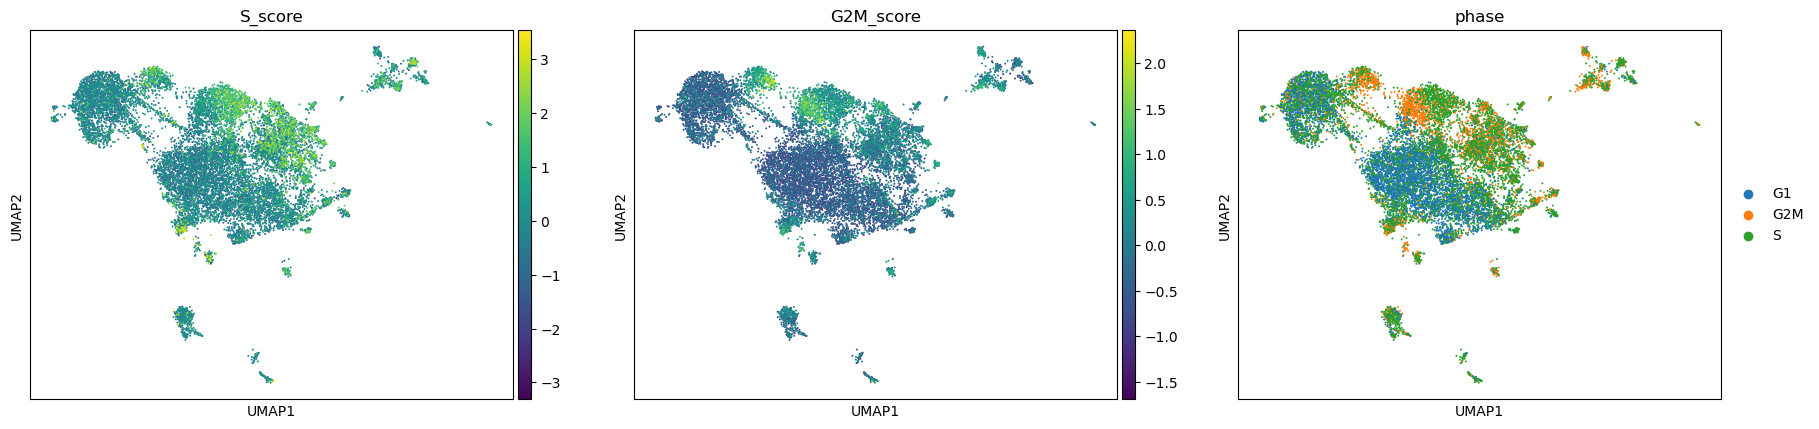

[mean_expression_per_cluster] WARNING: missing genes skipped: ['EPCAM']


In [252]:
# ----------------------------------------
# 1) Score cell cycle (proliferation)
# ----------------------------------------


# Add S_score, G2M_score, phase
score_cell_cycle(adata_proc, use_raw=True)

# Visualize
plot_cell_cycle_on_umap(adata_proc)

# ----------------------------------------
# 2) Compare epithelial / proliferation markers by cluster
# ----------------------------------------

tumor_marker_genes = ["EPCAM", "KRT17", "MKI67"]  # extend as you like

cluster_means = mean_expression_per_cluster(
    adata_proc,
    genes=tumor_marker_genes,
    cluster_key="leiden",   # or "leiden", or your custom column
    layer=None,              # or e.g. "log1p"
    use_raw=True,
    min_cells_per_cluster=20,
)



# If you want a pretty gradient in the notebook:
cluster_means.style.background_gradient(cmap="viridis")


In [253]:
from __future__ import annotations
from typing import Dict, Iterable, Sequence, Optional

import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData


def mean_expression_per_cluster(
    adata: AnnData,
    genes: Iterable[str],
    *,
    cluster_key: str = "louvain",
    layer: str | None = None,
    use_raw: bool | None = None,
    min_cells_per_cluster: int = 0,
) -> pd.DataFrame:
    """
    Compute mean expression of selected genes per cluster.

    Parameters
    ----------
    adata
        AnnData object.
    genes
        Iterable of gene names to summarize.
    cluster_key
        Column in `adata.obs` defining clusters (e.g. "louvain", "leiden").
    layer
        If not None, use this layer instead of `adata.X`.
    use_raw
        If True, use `adata.raw`. Passed to `sc.get.obs_df`.
    min_cells_per_cluster
        If > 0, clusters with fewer cells than this are dropped.

    Returns
    -------
    DataFrame
        Index: clusters (as strings)
        Columns: genes
    """
    if cluster_key not in adata.obs.columns:
        raise KeyError(f"Cluster key '{cluster_key}' not found in adata.obs")

    genes = list(genes)
    genes_present = [g for g in genes if g in adata.var_names]

    if len(genes_present) == 0:
        raise ValueError("None of the requested genes are present in adata.var_names.")

    missing = sorted(set(genes) - set(genes_present))
    if missing:
        print(f"[mean_expression_per_cluster] WARNING: "
              f"missing genes skipped: {missing}")

    expr = sc.get.obs_df(
        adata,
        keys=genes_present,
        layer=layer,
        use_raw=use_raw,
    )

    expr[cluster_key] = adata.obs[cluster_key].astype(str).values

    if min_cells_per_cluster > 0:
        counts = expr[cluster_key].value_counts()
        keep_clusters = counts[counts >= min_cells_per_cluster].index
        expr = expr[expr[cluster_key].isin(keep_clusters)]

    cluster_means = (
        expr.groupby(cluster_key)[genes_present]
        .mean()
        .sort_index()
    )

    return cluster_means


def mean_marker_groups_per_cluster(
    adata: AnnData,
    marker_groups: Dict[str, Sequence[str]],
    *,
    cluster_key: str = "louvain",
    layer: str | None = None,
    use_raw: bool | None = None,
    min_cells_per_cluster: int = 0,
) -> pd.DataFrame:
    """
    For each marker group (e.g. Tumor_epithelial, Immune, Stromal),
    compute the mean expression per cluster by averaging over
    all available genes in that group.

    Returns a DataFrame:
        index  = clusters
        columns = marker group names (one value per group)
    """
    all_clusters = None
    group_means = {}

    for group_name, genes in marker_groups.items():
        if len(genes) == 0:
            print(f"[mean_marker_groups_per_cluster] WARNING: group '{group_name}' "
                  f"has no genes; skipping.")
            continue

        gene_means = mean_expression_per_cluster(
            adata,
            genes,
            cluster_key=cluster_key,
            layer=layer,
            use_raw=use_raw,
            min_cells_per_cluster=min_cells_per_cluster,
        )  # clusters x genes_in_group_present

        # average over genes within the group
        group_mean = gene_means.mean(axis=1)

        if all_clusters is None:
            all_clusters = group_mean.index

        # Always reindex to the same cluster order
        group_mean = group_mean.reindex(all_clusters)

        group_means[group_name] = group_mean


        group_means[group_name] = group_mean

    if not group_means:
        raise ValueError("No non-empty marker groups with genes present in adata.var_names.")

    result = pd.DataFrame(group_means)
    result.index.name = cluster_key
    return result

def score_tumor_suspicion(
    adata: AnnData,
    marker_groups: Dict[str, Sequence[str]],
    *,
    cluster_key: str = "louvain",
    layer: str | None = None,
    use_raw: bool | None = None,
    min_cells_per_cluster: int = 0,
    group_weights: Optional[Dict[str, float]] = None,
    use_cell_cycle: bool = True,
    cell_cycle_weight: float = 0.5,
    score_col: str = "tumor_score",
    label_col: str = "tumor_label",
    threshold: float | None = None,
    high_quantile: float = 0.75,
    write_to_adata: bool = True,
) -> pd.DataFrame:
    """
    Compute a tumor-suspicion score per cluster using marker groups and optionally
    cell-cycle scores, then label clusters as tumor-like or not.

    Parameters
    ----------
    adata
        AnnData object. Ideally already has S_score and G2M_score in `obs`
        if use_cell_cycle=True.
    marker_groups
        Dict from group name -> list of genes.
        Example:
            {
              "Tumor_epithelial": ["EPCAM", "KRT17", "KRT8", "KRT18"],
              "Immune": ["PTPRC", "LYZ", "CD3D", ...],
              "Stromal": ["COL1A1", "DCN", "VWF", ...],
            }
    cluster_key
        Column in `adata.obs` defining clusters.
    group_weights
        Dict of group -> weight in the composite score.
        If None, a simple heuristic is used:
          - groups whose name contains "tumor" or "epi": +1
          - groups that look immune/stromal/myeloid/fibroblast/endothelial: -0.5
          - others: 0
    use_cell_cycle
        If True and S_score/G2M_score exist, add mean cell-cycle score per cluster.
    cell_cycle_weight
        Weight for the cell-cycle contribution in the final score.
    score_col
        Name of the composite tumor score column in the returned DataFrame.
    label_col
        Name of the binary label column ("tumor_like"/"non_tumor_like").
        If write_to_adata, this label will also be written to adata.obs.
    threshold
        Numeric threshold on the composite score. If None, use `high_quantile`.
    high_quantile
        If threshold is None, use this quantile of the composite score as cutoff.
    write_to_adata
        If True, write per-cell labels in `adata.obs[label_col]`.

    Returns
    -------
    cluster_scores : DataFrame
        Index: clusters
        Columns:
          - one column per marker group
          - optional: S_score_mean, G2M_score_mean, proliferation_mean
          - `score_col` (composite numeric score)
          - `label_col` (string: "tumor_like" / "non_tumor_like")
    """
    # 1) marker-based group means per cluster
    cluster_scores = mean_marker_groups_per_cluster(
        adata,
        marker_groups,
        cluster_key=cluster_key,
        layer=layer,
        use_raw=use_raw,
        min_cells_per_cluster=min_cells_per_cluster,
    )

    # 2) optional: add cell-cycle means
    used_cell_cycle = False
    if use_cell_cycle and {"S_score", "G2M_score"}.issubset(adata.obs.columns):
        cc = adata.obs[[cluster_key, "S_score", "G2M_score"]].copy()
        cc[cluster_key] = cc[cluster_key].astype(str)
        cc_means = (
            cc.groupby(cluster_key)[["S_score", "G2M_score"]]
            .mean()
        )
        cc_means["proliferation_mean"] = cc_means[["S_score", "G2M_score"]].mean(axis=1)

        # align index
        cc_means = cc_means.reindex(cluster_scores.index)
        cluster_scores = pd.concat([cluster_scores, cc_means], axis=1)
        used_cell_cycle = True
    elif use_cell_cycle:
        print("[score_tumor_suspicion] use_cell_cycle=True but S_score/G2M_score "
              "not found in adata.obs; skipping cell-cycle contribution.")

    # 3) build group weights if not provided
    if group_weights is None:
        group_weights = {}
        for name in cluster_scores.columns:
            lname = name.lower()
            if lname.startswith("s_score") or lname.startswith("g2m") or lname.startswith("proliferation"):
                # handle later in cell cycle section
                continue
            if "tumor" in lname or "epi" in lname:
                group_weights[name] = 1.0
            elif any(x in lname for x in ["immune", "stromal", "myeloid",
                                          "fibroblast", "endothelial"]):
                group_weights[name] = -0.5
            else:
                group_weights[name] = 0.0

        print("[score_tumor_suspicion] Using heuristic group weights:", group_weights)

    # 4) compute marker-based score
    marker_score = np.zeros(len(cluster_scores), dtype=float)
    for group_name, w in group_weights.items():
        if group_name not in cluster_scores.columns or w == 0.0:
            continue
        marker_score += w * cluster_scores[group_name].values

    cluster_scores["marker_score"] = marker_score

    # 5) add cell-cycle if available
    if used_cell_cycle and cell_cycle_weight != 0.0:
        cluster_scores[score_col] = \
            cluster_scores["marker_score"] + \
            cell_cycle_weight * cluster_scores["proliferation_mean"]
    else:
        cluster_scores[score_col] = cluster_scores["marker_score"]

    # 6) choose threshold
    if threshold is None:
        threshold = cluster_scores[score_col].quantile(high_quantile)
        print(f"[score_tumor_suspicion] Using {high_quantile:.2f} quantile "
              f"as threshold: {threshold:.3f}")

    # 7) classify clusters
    cluster_scores[label_col] = np.where(
        cluster_scores[score_col] >= threshold,
        "tumor_like",
        "non_tumor_like",
    )

    # 8) optionally write per-cell labels AND scores into adata.obs
    if write_to_adata:
        cluster_to_label = cluster_scores[label_col].to_dict()
        cluster_to_score = cluster_scores[score_col].to_dict()

        cluster_series = adata.obs[cluster_key].astype(str)

        adata.obs[label_col] = cluster_series.map(cluster_to_label)
        adata.obs[score_col] = cluster_series.map(cluster_to_score)

    return cluster_scores



In [254]:
# Example marker groups for bladder tumor vs normal
marker_groups = {
    # tumor-ish epithelial (you can refine with bladder luminal/basal markers)
    "Tumor_epithelial": [
        "EPCAM", "KRT8", "KRT18", "KRT17", "KRT6A", "MKI67"
    ],

    # pan-immune
    "Immune": [
        "PTPRC",  # CD45
        "LYZ",
        "CD3D", "CD3E", "CD8A", "CD4",   # T
        "MS4A1", "CD79A",                # B
    ],

    # stromal (fibroblast + endothelial)
    "Stromal": [
        "COL1A1", "COL1A2", "DCN", "LUM",     # fibroblast
        "PECAM1", "VWF", "KDR",              # endothelial
    ],
}

# Make sure you already ran cell-cycle scoring:
# from tumor_normal_helpers import score_cell_cycle
# score_cell_cycle(adata, use_raw=False)

cluster_scores = score_tumor_suspicion(
    adata_proc,
    marker_groups=marker_groups,
    cluster_key="leiden",
    layer=None,          # or "log1p" if you have it as a layer
    use_raw=True,
    min_cells_per_cluster=30,
    group_weights=None,  # or provide your own dict
    use_cell_cycle=True,
    cell_cycle_weight=0.5,
    score_col="tumor_score",
    label_col="tumor_label",
    threshold=None,      # use 0.75 quantile
    high_quantile=0.75,
    write_to_adata=True,
)

cluster_scores


[mean_expression_per_cluster] WARNING: missing genes skipped: ['EPCAM', 'KRT18', 'KRT8']
[mean_expression_per_cluster] WARNING: missing genes skipped: ['PECAM1']
[score_tumor_suspicion] Using heuristic group weights: {'Tumor_epithelial': 1.0, 'Immune': -0.5, 'Stromal': -0.5}
[score_tumor_suspicion] Using 0.75 quantile as threshold: 1.019


Tumor_epithelial    Immune   Stromal   S_score  G2M_score  \
leiden                                                              
0               0.586258  0.000142  0.008429 -0.509224  -0.636347   
1               0.984300  0.003518  0.005862  0.476799  -0.131975   
10              1.057420  0.002248  0.010262 -0.353760  -0.477890   
11              0.762713  0.000879  0.007056 -0.100552  -0.077682   
12              1.063730  0.000000  0.010379 -0.213002  -0.427200   
13              0.335969  0.543541  0.002676 -0.045919  -0.365773   
14              1.122546  0.010658  0.000000  0.379019  -0.069680   
15              1.188125  0.000000  0.005361  0.502926   0.141577   
16              1.258848  0.010479  0.011712  0.138949   0.178142   
2               0.494076  0.000161  0.006287 -0.421372  -0.537252   
3               1.095663  0.002371  0.007924 -0.236622  -0.478490   
4               0.804906  0.000678  0.007537  0.512035   0.360407   
5               0.743610  0.000816  0.018718 -0.035447  -0.443421   
6               1.022029  0.010740  0.490390  0.154000  -0.050072   
7               0.731508  0.000368  0.007393  0.213733   0.344560   
8               0.510661  0.002115  0.003010  0.009451  -0.254790   
9               0.329938  0.204519  0.003857 -0.052620  -0.284540   

        proliferation_mean  marker_score  tumor_score     tumor_label  
leiden                                                                 
0                -0.572785      0.581973     0.295580  non_tumor_like  
1                 0.172412      0.979609     1.065815      tumor_like  
10               -0.415825      1.051165     0.843253  non_tumor_like  
11               -0.089117      0.758746     0.714188  non_tumor_like  
12               -0.320101      1.058541     0.898490  non_tumor_like  
13               -0.205846      0.062860    -0.040063  non_tumor_like  
14                0.154670      1.117217     1.194552      tumor_like  
15                0.322252      1.185444     1.346570      tumor_like  
16                0.158546      1.247753     1.327026      tumor_like  
2                -0.479312      0.490852     0.251196  non_tumor_like  
3                -0.357556      1.090516     0.911738  non_tumor_like  
4                 0.436221      0.800799     1.018910      tumor_like  
5                -0.239434      0.733843     0.614126  non_tumor_like  
6                 0.051964      0.771464     0.797446  non_tumor_like  
7                 0.279146      0.727628     0.867201  non_tumor_like  
8                -0.122670      0.508098     0.446763  non_tumor_like  
9                -0.168580      0.225750     0.141460  non_tumor_like

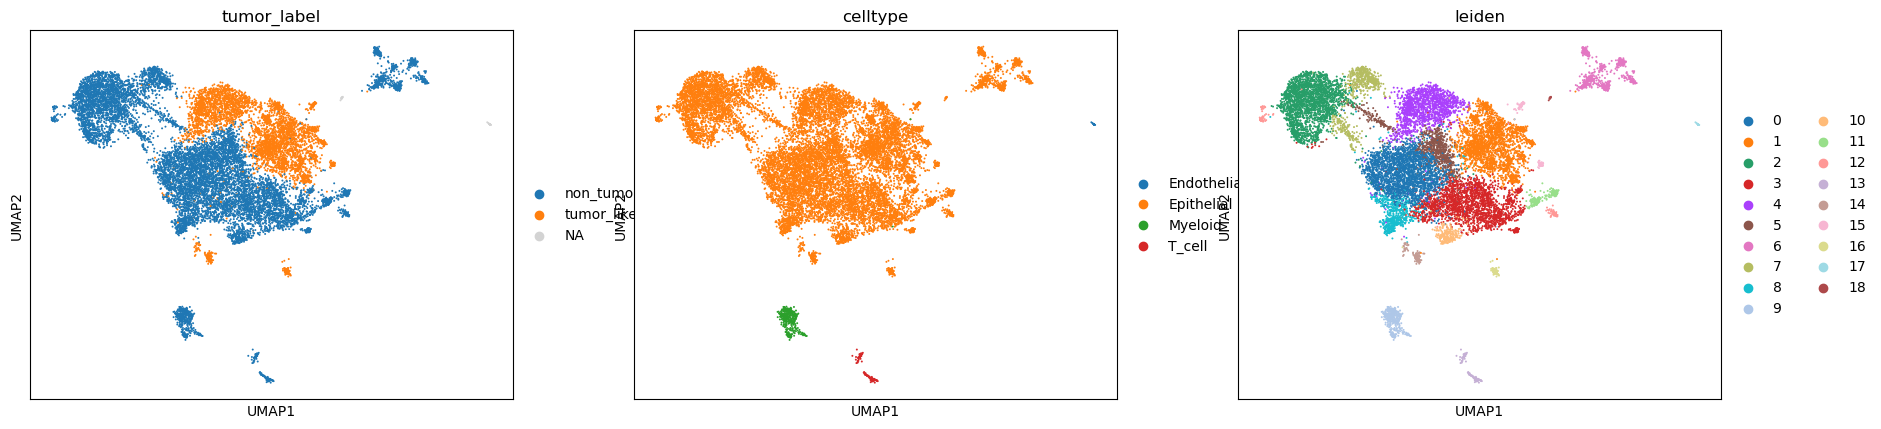

In [255]:
sc.pl.umap(adata_proc, color=["tumor_label", "celltype", "leiden"])

In [256]:
sc.pl.umap(adata_proc, color=["tumor_label", "tumor_score", "leiden"])



# CNV based

In [257]:
import anndata as ad

# adata = your current HVG object (umap, louvain etc. already there)

# make a full-gene copy from .raw
adata_cnv = ad.AnnData(
    X   = adata_proc.raw.X.copy(),      # normalized + log1p, all genes
    obs = adata_proc.obs.copy(),
    var = adata_proc.raw.var.copy()
)


# keep louvain / sample / condition etc in obs as before
adata_cnv.obs.head(), adata_cnv.var.head()




(                                      gsm sample condition       batch  \
 barcode                                                                  
 GSM6919780:AAACCTGAGAAGGCCT-1  GSM6919780     p2       BCA  GSM6919780   
 GSM6919780:AAACCTGAGATCGATA-1  GSM6919780     p2       BCA  GSM6919780   
 GSM6919780:AAACCTGAGATGTGGC-1  GSM6919780     p2       BCA  GSM6919780   
 GSM6919780:AAACCTGAGCTAACAA-1  GSM6919780     p2       BCA  GSM6919780   
 GSM6919780:AAACCTGAGCTAGTCT-1  GSM6919780     p2       BCA  GSM6919780   
 
                                n_genes_by_counts  log1p_n_genes_by_counts  \
 barcode                                                                     
 GSM6919780:AAACCTGAGAAGGCCT-1               3707                 8.218248   
 GSM6919780:AAACCTGAGATCGATA-1               5435                 8.600799   
 GSM6919780:AAACCTGAGATGTGGC-1               1158                 7.055313   
 GSM6919780:AAACCTGAGCTAACAA-1               2080                 7.640604   
 GSM6

In [258]:
adata_cnv.var_names[:10]

Index(['TNFRSF4', 'TNFRSF18', 'ATAD3B', 'THAP3', 'PRKCZ', 'ACAP3', 'PUSL1',
       'PEX10', 'CPTP', 'ENSG00000238260'],
      dtype='object', name='gene_symbol')

In [ ]:
import infercnvpy as cnv

cnv.io.genomic_position_from_biomart(
    adata_cnv,
    adata_gene_id=None,            # default: adata.var_names
    biomart_gene_id='hgnc_symbol', # or 'ensembl_gene_id'
    species='hsapiens',            # default human
    inplace=True
)



In [260]:
import numpy as np

def summarize_coords(name, ad):
    # total genes
    n_total = ad.var.shape[0]
    
    # genes that have all three coordinates present
    has_coords = ad.var[["chromosome", "start", "end"]].notna().all(axis=1)
    n_with = int(has_coords.sum())
    n_without = n_total - n_with
    
    print(f"{name}:")
    print(f"  total genes          : {n_total}")
    print(f"  with coordinates     : {n_with}")
    print(f"  missing coordinates  : {n_without}")
    print("")


summarize_coords("adata_cnv", adata_cnv)

adata_cnv:
  total genes          : 20706
  with coordinates     : 15606
  missing coordinates  : 5100



In [263]:

cnv.tl.infercnv(
    adata_cnv,
    reference_key="leiden",
     
    key_added="cnv",
    
    n_jobs=10
)

  0%|          | 0/3 [00:00<?, ?it/s]/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pyp

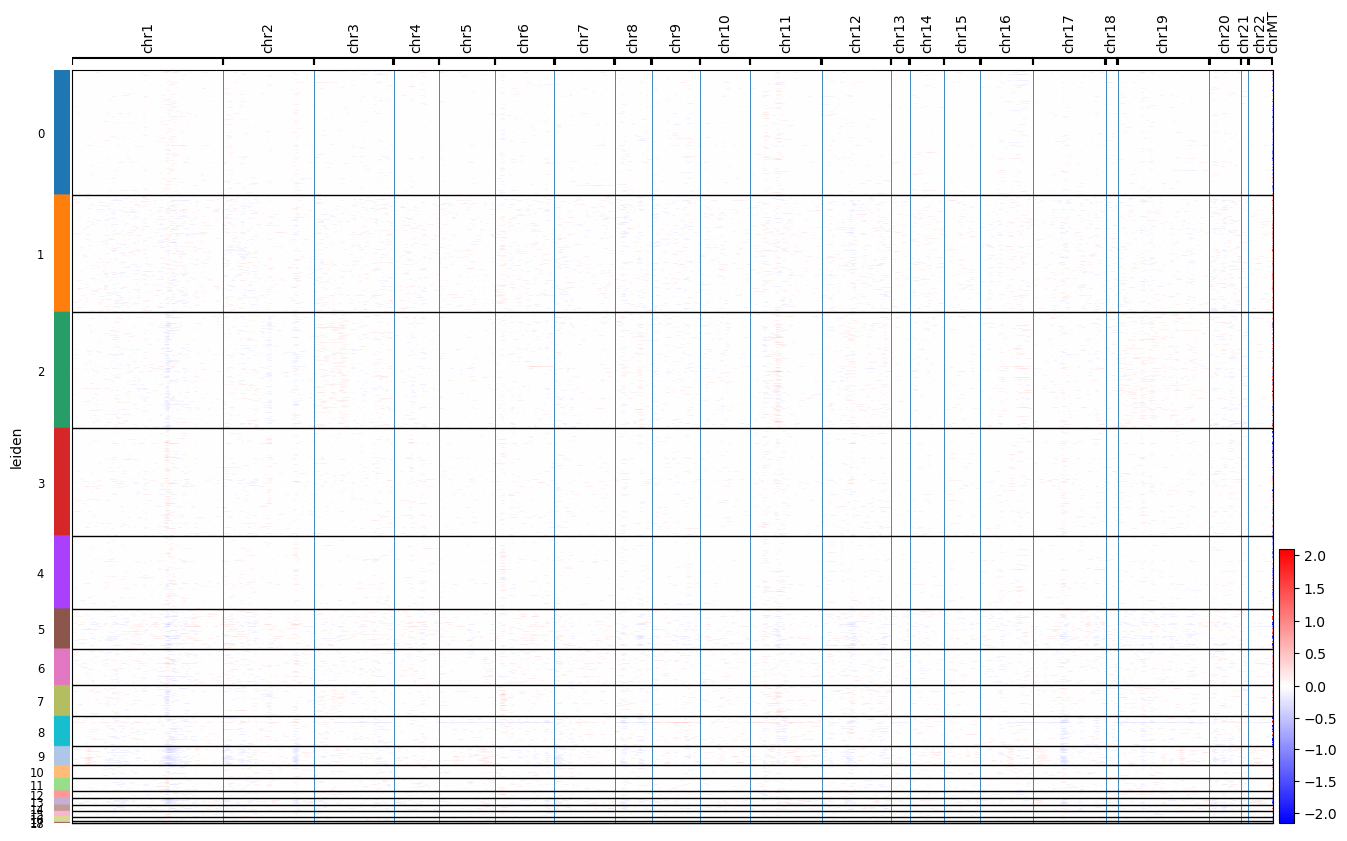

In [264]:
cnv.pl.chromosome_heatmap(adata_cnv, groupby="leiden")